In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython import display
import seaborn as sns
import csv


In [5]:
df = pd.read_csv('Datasets/startup.csv')

In [12]:
df

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.118022:-77.232401
13728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.952306:-91.162325
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385


In [14]:
# sns.distplot(df['founded_at'].dropna().sort_values(), hist=True, kde=True, bins=20)
# sns.distplot(df['founded_at'].dropna(), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
df['founded_at'].unique()



array(['2011', '2008', '2014', '2000', '2013', '2012', '2007', '2010',
       '1990', '2002', '2001', '2009', '2006', '1999', '1998', '2004',
       '2015', '2005', '1986', '2003', '1971', '1989', '1997', '1979',
       '1993', '1987', '1961', '1996', '1947', '1994', '1992', '1984',
       '1995', '1949', '1985', '1974', '1969', '1975', '1918', '1980',
       '1944', '1972', '1983', '1982', '1976', '1988', '1991', '1977',
       '26-Feb', '1973', '1981', '1917', 'Feb-31', '1-Jan', '1970',
       '1906', '1978', '19-Jul', '1958', '1966', '1953', '1952', '1956',
       '1908', '1962', '1945', '1967', '1909', '1954', '1968', '1965',
       '1928', '1963', '18-Sep', '24-Aug', '1920', '1925', '1930', '1926',
       '1919', '1924', '1951', '29-Apr', '1923', '1914', '1929', '1902',
       '1939', '1912', '1911', '1933', '1950', nan], dtype=object)

In [15]:
df[df['founded_at'] == '2011']['funding_total_usd']

0        33.600000
1         1.150050
9         0.794000
13        3.400000
20        0.500000
           ...    
13661    35.600000
13665    45.500000
13681     4.220018
13690     0.080000
13711     2.150000
Name: funding_total_usd, Length: 1533, dtype: float64

In [17]:
df[df['founded_at'] == '2011']['funding_total_usd'].sum()

24591.267369436

In [18]:
df[df['founded_at'] == '2011']['funding_total_usd'].sort_values()

10977       0.0100
12269       0.0100
12382       0.0110
10001       0.0120
5734        0.0140
           ...    
11002     398.0000
13269     578.7000
6996      592.0000
10968    1185.5850
11001    1766.1999
Name: funding_total_usd, Length: 1533, dtype: float64

# Find total funding for each year

In [19]:
df['founded_at'].sort_values()

11950    1-Jan
1522     1-Jan
2738     1-Jan
11955    1-Jan
12529    1-Jan
         ...  
13727      NaN
13728      NaN
13729      NaN
13730      NaN
13731      NaN
Name: founded_at, Length: 13732, dtype: object

In [20]:
list(df['founded_at'].sort_values().unique())

['1-Jan',
 '18-Sep',
 '19-Jul',
 '1902',
 '1906',
 '1908',
 '1909',
 '1911',
 '1912',
 '1914',
 '1917',
 '1918',
 '1919',
 '1920',
 '1923',
 '1924',
 '1925',
 '1926',
 '1928',
 '1929',
 '1930',
 '1933',
 '1939',
 '1944',
 '1945',
 '1947',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1956',
 '1958',
 '1961',
 '1962',
 '1963',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '24-Aug',
 '26-Feb',
 '29-Apr',
 'Feb-31',
 nan]

In [21]:
# def total_funding():
#     years = list(df['founded_at'].sort_values().unique())
#     funding = {}
#     for year in years:
#         funding[year] = df[df['founded_at'] == year]['funding_total_usd'].sum()

ls = []
for i in list(df['founded_at'].sort_values().unique()):
    ls.append(df[df['founded_at'] == i]['funding_total_usd'].sum())

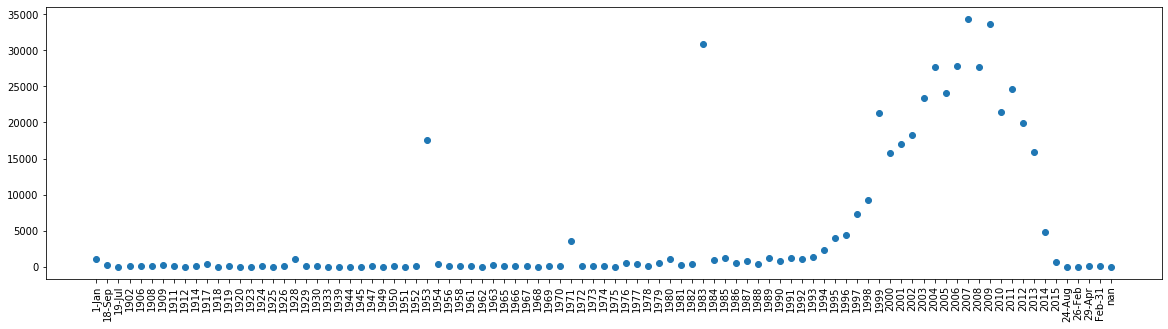

In [24]:
plt.figure(figsize= (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df['founded_at'].sort_values().unique()), ls, 'o')

In [25]:
df

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.118022:-77.232401
13728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.952306:-91.162325
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385
13730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664274:-73.9385


# For software category 


In [31]:
software_ls = []

# for i in list(df[df['category_list'] == 'Software']['founded_at'].sort_values().unique()):
#     software_ls.append()
software_ls = []
for i in list(df['founded_at'].sort_values().unique()):
    software_ls.append(df[(df['founded_at'] == i) & (df['category_list'] == 'Software')]['funding_total_usd'].sum())

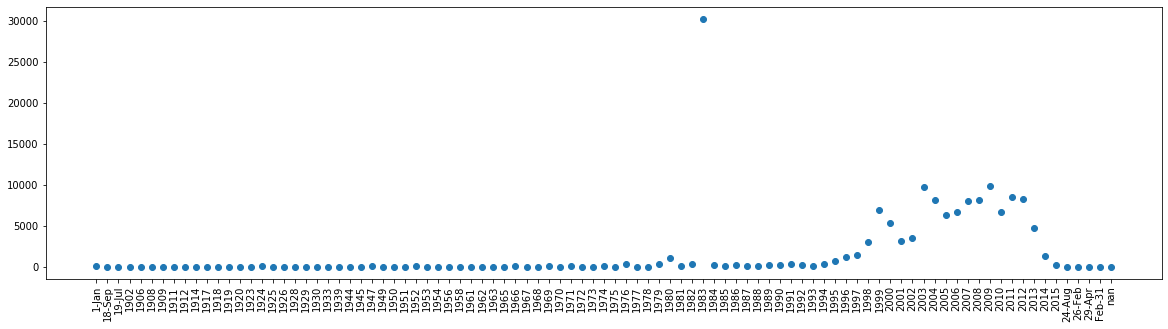

In [32]:
plt.figure(figsize= (20,5), frameon = False)
plt.xticks(rotation=90)
plt.plot(list(df['founded_at'].sort_values().unique()), software_ls, 'o')